In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def simple_gradient():
    # print the gradient of 2x^2 + 5x
    x = Variable(torch.ones(2, 2) * 2, requires_grad=True)
    z = 2 * (x * x) + 5 * x
    # run the backpropagation
    z.backward(torch.ones(2, 2))
    print(x.grad)

In [6]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))
                               ])
    
train_dataset = datasets.MNIST(root='./data', train=True, download=True,
                               transform=transform)
test_loader = torch.utils.data.DataLoader(train_dataset,batch_size=100, shuffle=True)

In [7]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1 , 2 , 0)
    image = image * np.array((0.5 ,0.5 , 0.5)) + np.array((0.5 , 0.5, 0.5))
    image = image.clip(0,1)
    return image

<IPython.core.display.Javascript object>


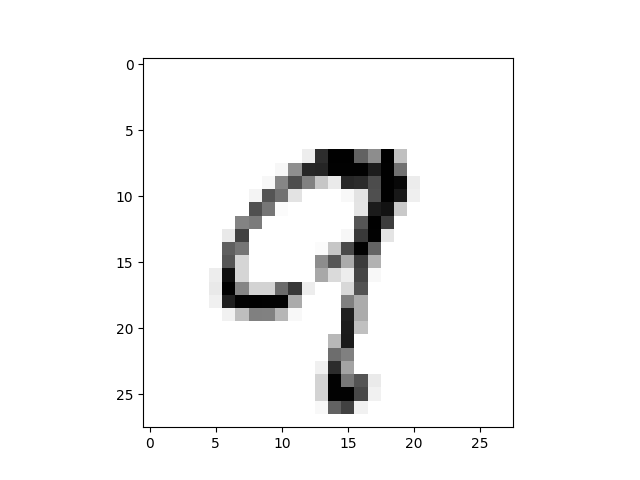

In [9]:
%matplotlib notebook
dataiter = iter(test_loader) 
images , labels = dataiter.next()
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

<IPython.core.display.Javascript object>


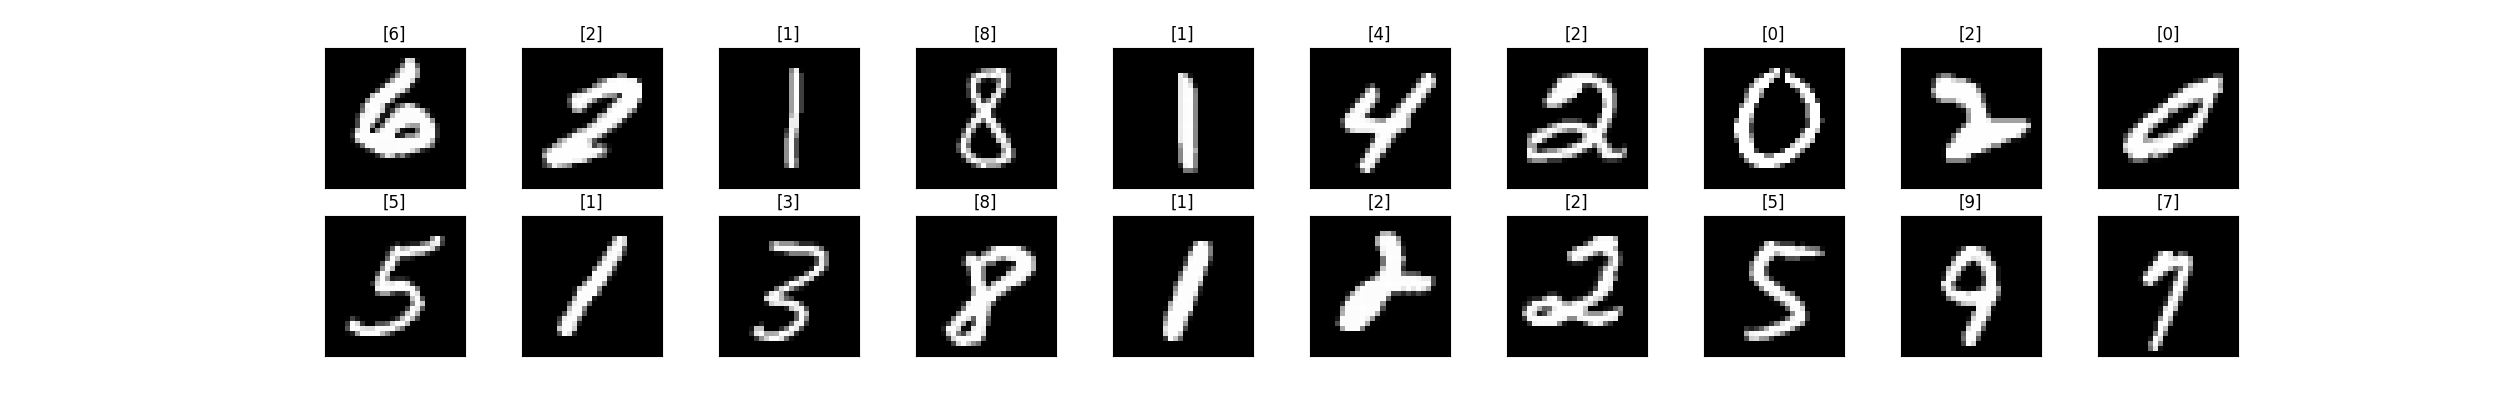

In [10]:
%matplotlib notebook
dataiter = iter(test_loader)
images , labels = dataiter.next()
fig = plt.figure(figsize = (25,4))

for idx in np.arange(20):
    ax = fig.add_subplot(2 , 10 , idx+1,xticks=[],yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

In [5]:
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(28 * 28, 200)
            self.fc2 = nn.Linear(200, 200)
            self.fc3 = nn.Linear(200, 10)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return F.log_softmax(x,dim =1) 

    net = Net()
    print(net)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


In [12]:
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9) # stochastic gradient descent optimizer    
criterion = nn.NLLLoss()# loss function

In [14]:
# run the main training loop   
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(test_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(test_loader.dataset),
                100. * batch_idx / len(test_loader), loss.data))
    # run a test loop
test_loss=0
correct = 0
for data, target in test_loader:
    data, target = Variable(data, requires_grad=True), Variable(target)
    data = data.view(-1, 28 * 28)
    net_out = net(data)
    # sum up batch loss
    test_loss += criterion(net_out, target).data
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

if __name__ == "__main__":
    run_opt = 2
    if run_opt == 1:
        simple_gradient()

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.092734
Train Epoch: 0 [1000/60000 (2%)]	Loss: 0.034696
Train Epoch: 0 [2000/60000 (3%)]	Loss: 0.054731
Train Epoch: 0 [3000/60000 (5%)]	Loss: 0.025627
Train Epoch: 0 [4000/60000 (7%)]	Loss: 0.017608
Train Epoch: 0 [5000/60000 (8%)]	Loss: 0.145770
Train Epoch: 0 [6000/60000 (10%)]	Loss: 0.028402
Train Epoch: 0 [7000/60000 (12%)]	Loss: 0.031925
Train Epoch: 0 [8000/60000 (13%)]	Loss: 0.061147
Train Epoch: 0 [9000/60000 (15%)]	Loss: 0.031513
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.066834
Train Epoch: 0 [11000/60000 (18%)]	Loss: 0.059478
Train Epoch: 0 [12000/60000 (20%)]	Loss: 0.013075
Train Epoch: 0 [13000/60000 (22%)]	Loss: 0.035815
Train Epoch: 0 [14000/60000 (23%)]	Loss: 0.030791
Train Epoch: 0 [15000/60000 (25%)]	Loss: 0.052792
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.078316
Train Epoch: 0 [17000/60000 (28%)]	Loss: 0.054687
Train Epoch: 0 [18000/60000 (30%)]	Loss: 0.102342
Train Epoch: 0 [19000/60000 (32%)]	Loss: 0.035237
Train Epoch: 0 [200

In [15]:
import PIL.ImageOps
import requests
from PIL import Image as im

<IPython.core.display.Javascript object>


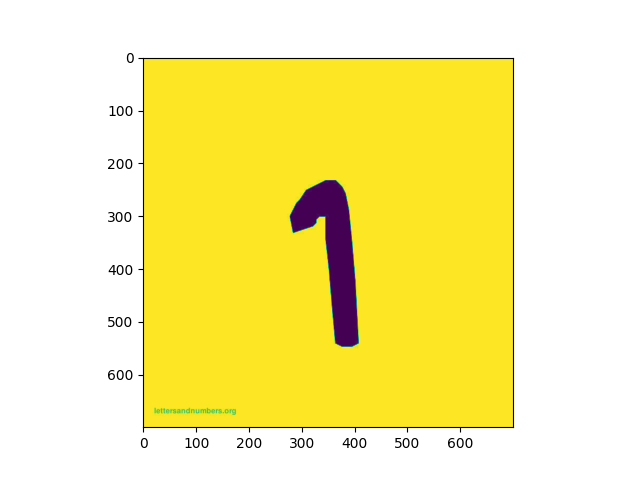

In [16]:
%matplotlib notebook
url = 'http://lettersandnumbers.org/handwriting-style/numbers/handwriting-number-1.jpg'
response =requests.get(url,stream =True)
img = im.open(response.raw)
plt.imshow(img)

<IPython.core.display.Javascript object>


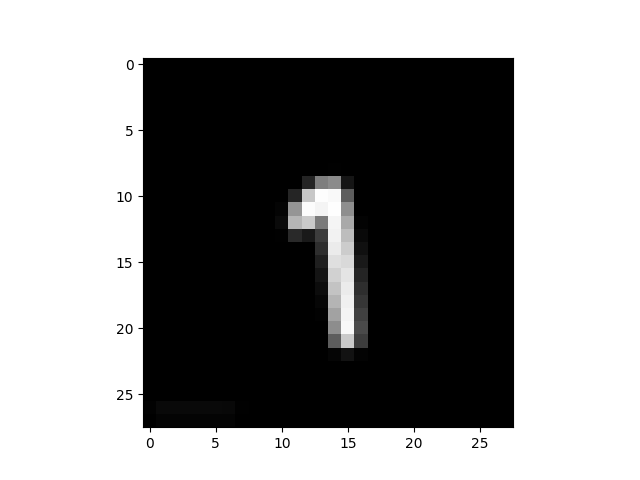

In [17]:
%matplotlib notebook
img = PIL.ImageOps.invert(img)
img=img.convert()
img = transform(img)
plt.imshow(im_convert(img))

In [18]:
def predictor(img):
    img =img.view(img.shape[0],-1)
    output = net(img)
    _, pred = torch.max(output,1)
    print(pred.item())

In [19]:
predictor(img)

1
